# Preliminary support for predictive coding  

If inhibitory interneurons subtract a prediction of ganglion firing, we should expect higher correlations between the ganglion cells and connected inhibitory interneurons if we were able to silence inhibitory communication to the ganglion cells (but not alter the inhibitory membrane potential).  

We can essentially do this with intracellular record & playback experiments. This notebook will help provide some quantitative intuition for what direction correlations should change, as a function of stimulus statistics.

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import sem, pearsonr
from image_processing_functions import load_images
import os

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
from matplotlib.pyplot import *

# note that nonposx(y) for log plots will no longer work with this package
import mpld3
#mpld3.enable_notebook()

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
stimulus_type = 'white-noise'

if stimulus_type == 'natural-scenes':
    im_dir = os.path.expanduser('~/Documents/Natural_Images/RawData/cd13A') # flood plain, water, horizon
    patch_size = None
    num_images = 100
    stimulus = load_images(im_dir, num_images, patch_size, square=True, normalize='divisive')

elif stimulus_type == 'white-noise':
    stimulus = np.random.randn(100,32,32) 

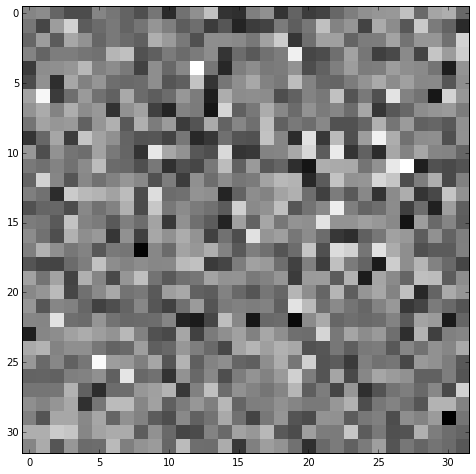

In [11]:
imshow(stimulus[0])